# Basic RNN example using IMDB dataset

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, SimpleRNN, LSTM, Embedding
from keras.models import Sequential
import matplotlib.pyplot as plt
import helpers
import keras
import tensorflow as tf

# this code below allows me to train the model even when the gpu is occupied by another process
# https://stackoverflow.com/questions/43990046/tensorflow-blas-gemm-launch-failed
physical_devices = tf.config.list_physical_devices('GPU') 
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)


In [2]:
max_features = 10000 #consider the top 10,000 most common words
maxlen = 500
batch_size = 32

print('Loading data...')
# more info about dataset https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)


print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print(input_train.shape, "input train shape")
print(input_test.shape, "input_test shape")


Loading data...
25000 train sequences
25000 test sequences
(25000,) input train shape
(25000,) input_test shape


In [3]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print("After padding")
print(input_train.shape, "input train shape")
print(input_test.shape, "input_test shape")


After padding
(25000, 500) input train shape
(25000, 500) input_test shape


In [4]:
print(input_train[0]) # the words in the review are already encoded to integers
print(len(input_train[0]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [8]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
callbacks = [tf.keras.callbacks.EarlyStopping(
    monitor="accuracy", mode="auto", restore_best_weights=True, patience=2)]
    
history = model.fit(input_train,
                    y_train,
                    epochs=10,
                    batch_size=64, validation_split=0.2,
                   callbacks=callbacks)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - 84s 267ms/step - loss: 0.5575 - accuracy: 0.7017 - val_loss: 0.4516 - val_accuracy: 0.7940
Epoch 2/10
313/313 [==============================] - 83s 267ms/step - loss: 0.3505 - accuracy: 0.8555 - val_loss: 0.3632 - val_accuracy: 0.8472
Epoch 3/10
313/313 [==============================] - 83s 266ms/step - loss: 0.2803 - ac

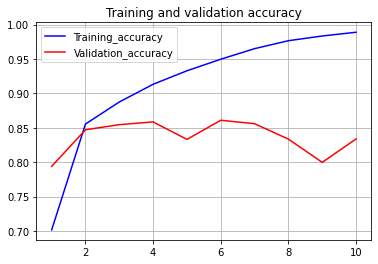

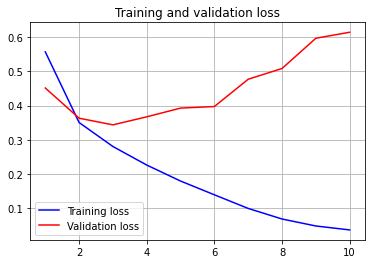

In [9]:
helpers.plot_training_validation_accuracy_loss(history)

In [10]:
loss, accuracy = model.evaluate(input_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy*100} % ')

Test Accuracy: 82.6960027217865 % 


In [16]:
# this model took sometime to train, so I am saving it for the future
import os
# os.listdir()
my_path = 'saved_models'
cwd = os.getcwd()
my_path = os.path.join(cwd, my_path)
# try:
#     os.mkdir(my_path)
# except OSError:
#     print ("Creation of the directory %s failed" % my_path)
# else:
#     print ("Successfully created the directory %s " % my_path)
    
my_path = os.path.join(my_path, "simpleRnnIMDB_1")
model.save(my_path)

INFO:tensorflow:Assets written to: /home/mo/machine_learning_practice/saved_models/simpleRnnIMDB_1/assets


In [18]:
# Create a new model instance to check I saved it good
model_reloaded = tf.keras.models.load_model(my_path)

# Check its architecture
model_reloaded.summary()


# Evaluate the model
loss, acc = model_reloaded.evaluate(input_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
782/782 - 31s - loss: 0.6434 - accuracy: 0.8270
Restored model, accuracy: 82.70%
